## Structure based splitting methods

#### [Perimeter Split](#perimeter)

- Places the pairs of data points with maximal pairwise distance in the test set.
- This was originally called the extrapolation-oriented split, introduced in  Szántai-Kis et. al., 2003

The perimeter split aims to select molecules that are on the outskirts of the molecular distribution by iteratively selecting the two molecules that are furthest away from each other and adding them to the test set. For model selection, it was found to lead to models that extrapolate (or generalize) better.

#### [Maximum Dissimilarity](maxidiss)
The Maximum Dissimilarity Split splits the data by trying to maximize the distance between train and test. This is done as follows:
1) As an initial test sample, take the data point that on average is furthest from all other samples.
2) As initial train sample, take the data point that is furthest from the initial test sample.
3) Iteratively add the train sample that is closest to the initial train sample.

The maximum dissimilarity split finds a split that maximizes the dissimilarity between train and test sets. To do so, the two most dissimilar molecules are each assigned to either set. Then, molecules that are closest to the first test molecule are iteratively added to the test set until the desired size is reached.

#### Goal
Both splitting methods are designed to increase the distance between the train and the test sets. The goal of using such splitting approach is to select models with better generalization capability. 

In [1]:
%load_ext autoreload
%autoreload 2
import datamol as dm
from splito import ScaffoldSplit, PerimeterSplit, MaxDissimilaritySplit

In [9]:
# Load dataset
data = dm.data.freesolv()
data.head(10)

,iupac,smiles,expt,calc
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917
5,"3,5-dimethylphenol",Cc1cc(cc(c1)O)C,-6.27,-5.444
6,"2,3-dimethylbutane",CC(C)C(C)C,2.34,2.468
7,2-methylpentan-2-ol,CCCC(C)(C)O,-3.92,-2.779
8,"1,2-dimethylcyclohexane",C[C@@H]1CCCC[C@@H]1C,1.58,1.685
9,butan-2-ol,CC[C@H](C)O,-4.62,-3.145


<a id='perimeter'></a>
**PerimeterSplit**

In [3]:
# Define PerimeterSplit
splitter = PerimeterSplit(n_jobs=-1, test_size=0.2, random_state=111)
train_idx, test_idx = next(splitter.split(X=data.smiles.values))
assert train_idx.shape[0] > test_idx.shape[0]
data.loc[train_idx, PerimeterSplit.__name__] = "train"
data.loc[test_idx, PerimeterSplit.__name__] = "test"

2023-09-18 13:26:48.293 | DEBUG    | partitio.utils:get_kmeans_clusters:68 - To use KMeans with the jaccard metric, we use the Empirical Kernel Map
/var/folders/_7/ffxc1f251dbb5msn977xl4sm0000gr/T/ipykernel_1473/3130813182.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'train' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[train_idx, PerimeterSplit.__name__] = "train"


<a id='maxidiss'></a>
**MaxDissimilaritySplit**

In [4]:
# Define PerimeterSplit
splitter = MaxDissimilaritySplit(n_jobs=-1, test_size=0.2, random_state=111)
train_idx, test_idx = next(splitter.split(X=data.smiles.values))
assert train_idx.shape[0] > test_idx.shape[0]
data.loc[train_idx, "MaxDissimilaritySplit"] = "train"
data.loc[test_idx, "MaxDissimilaritySplit"] = "test"

2023-09-18 13:27:05.801 | DEBUG    | partitio.utils:get_kmeans_clusters:68 - To use KMeans with the jaccard metric, we use the Empirical Kernel Map
/var/folders/_7/ffxc1f251dbb5msn977xl4sm0000gr/T/ipykernel_1473/1034566943.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'train' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[train_idx, "MaxDissimilaritySplit"] = "train"


### Check the distributions of train/test set generated by the `PerimeterSplit` and `MaxDissimilaritySplit` in the chemical space

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

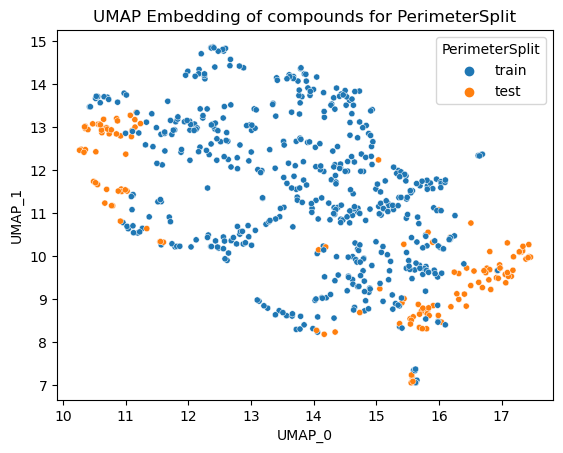

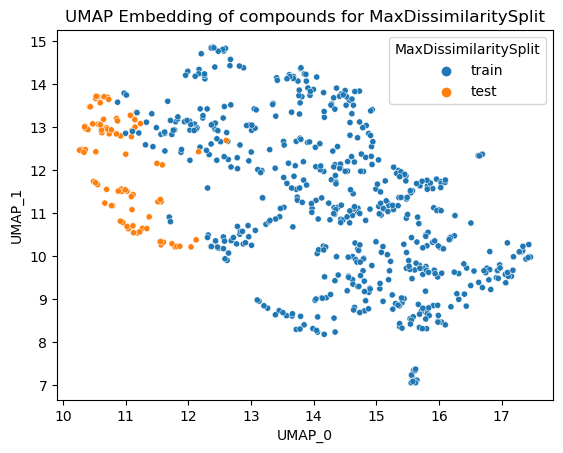

In [8]:
visualize_chemspace(data, ["PerimeterSplit", "MaxDissimilaritySplit"])